In [1]:
import cv2
import torch
from PIL import Image

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
print("Done")

C:\Users\wangm15\AppData\Local\mambaforge\envs\py310\lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\wangm15/.cache\torch\hub\master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
   ---------------------------------------- 207.3/207.3 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 2.5/2.5 MB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0

requirements: AutoUpdate success  15.6s, installed 2 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0']
requirements:  Restart runtime or rerun command for updates to take effect



YOLOv5  2024-5-23 Python-3.10.14 torch-2.2.0+cpu CPU

100%|█████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:08<00:00, 1.79MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Done


In [2]:
im = Image.open(r'C:\Users\wangm15\OneDrive - Corning Incorporated\Desktop\img\Beatles.jpg')  # PIL image

# Inference
results = model(im, augment=True)  # batch of images

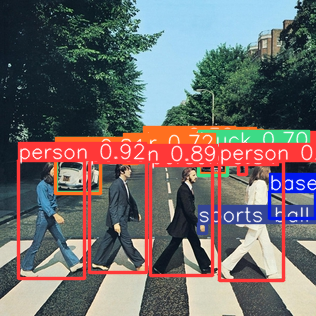

In [3]:
results.show()

In [24]:
dataframe = results.pandas().xyxy[0]
# dataframe
dataframe_1 = dataframe[dataframe['name'] == 'person']
# dataframe_1[['name']]
count = len(dataframe_1)
print(f"person的數量: {count}個")

person的數量: 5個


In [46]:
import cv2
import torch
from PIL import Image

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
print("Model import done")

im_1 = Image.open('cars.webp')  # PIL image

# Inference
results = model(im_1, augment=True)  # batch of images
dataframe = results.pandas().xyxy[0]
# dataframe
dataframe_1 = dataframe[dataframe['name'] == 'car']
# dataframe_1[['name']]
count = len(dataframe_1)
print(f"person的數量: {count}個")

Using cache found in C:\Users\wangm15/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-23 Python-3.10.14 torch-2.2.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Model import done
person的數量: 18個


## 使用 teachable machine 的模型

In [32]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_Model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("glass.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)
print("Class:", index, end="")

1/1 [==============================] - 1s 635ms/step
Class: glass
Confidence Score: 0.94435304
Class: 1

In [29]:
def process(image):
  # Disable scientific notation for clarity
  np.set_printoptions(suppress=True)

  # Load the model
  model = load_model("keras_model.h5", compile=False)

  # Load the labels
  class_names = open("labels.txt", "r").readlines()

  # Create the array of the right shape to feed into the keras model
  # The 'length' or number of images you can put into the array is
  # determined by the first position in the shape tuple, in this case 1
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

  # Replace this with the path to your image
  # image = Image.open("result1.png").convert("RGB")

  # resizing the image to be at least 224x224 and then cropping from the center
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

  # turn the image into a numpy array
  image_array = np.asarray(image)

  # Normalize the image
  normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

  # Load the image into the array
  data[0] = normalized_image_array

  # Predicts the model
  prediction = model.predict(data)
  index = np.argmax(prediction)
  class_name = class_names[index]
  confidence_score = prediction[0][index]

  # Print prediction and confidence score
  print("Class:", class_name[2:], end="")
  print("Confidence Score:", confidence_score)
  return class_name[2:], confidence_score

In [30]:
import gradio as gr
import skimage as ski
from PIL import Image
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import ndimage

gr.Interface(process,
             gr.Image(type='pil'),
             ['text','text']).launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 1s 660ms/step
Class: metal
Confidence Score: 0.9855181


## 使用 Keras Applications

In [34]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x.shape
x = np.expand_dims(x, axis=0)
x.shape
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])
model.summary()

35363/35363 [==============================] - 0s 1us/step
Predicted: [('n02124075', 'Egyptian_cat', 0.29533374), ('n02127052', 'lynx', 0.27787012), ('n02123045', 'tabby', 0.23494917)]
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv

In [35]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import gradio as gr
import skimage as ski
from PIL import Image

model = ResNet50(weights='imagenet')

def keras_app(image):
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
  x = np.array(image)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)

  return decode_predictions(preds, top=3)[0]

In [36]:
gr.Interface(keras_app,
             gr.Image(type="pil"),
             "text").launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 1s 862ms/step


In [37]:
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
import gradio as gr
import skimage as ski
from PIL import Image

model = MobileNetV2()

def keras_app(image):
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
  x = np.array(image)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)

  return decode_predictions(preds, top=3)[0]

14536120/14536120 [==============================] - 4s 0us/step


In [38]:
gr.Interface(keras_app,
             gr.Image(type="pil"),
             "text").launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 1s 675ms/step


## Perspective Transformation

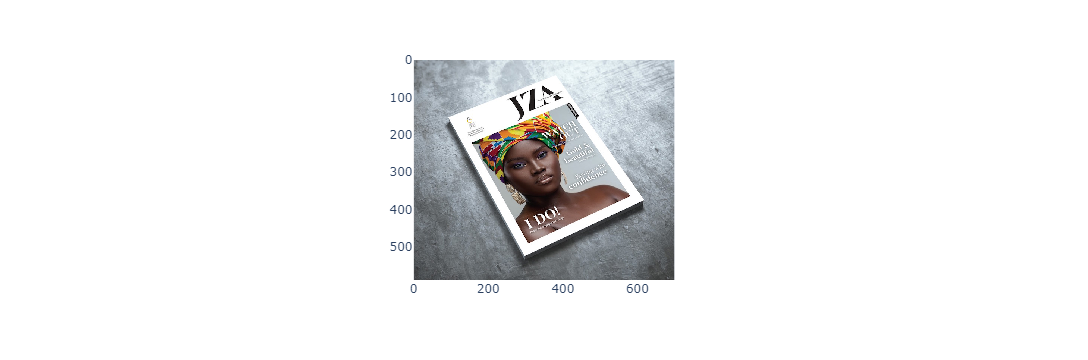

In [42]:
import cv2
import skimage
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from PIL import Image

lady = Image.open('magazine_1.jpg')
px.imshow(lady)

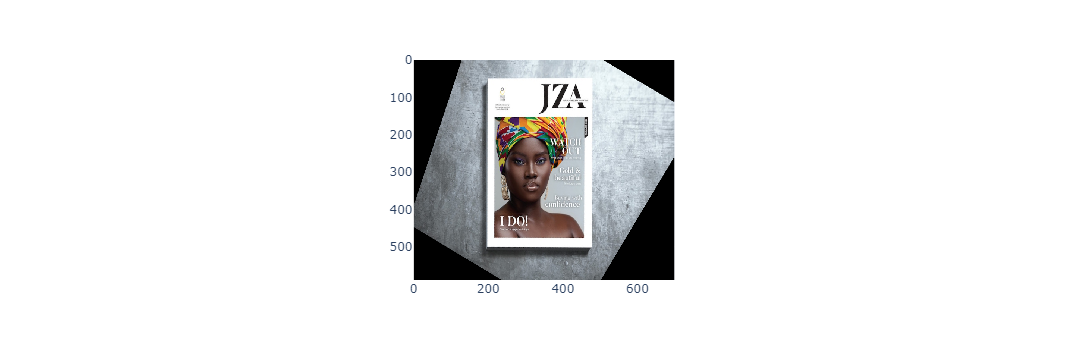

In [43]:
p1 = np.float32([[95,154],[383,42],[619,373],[300,524]])
p2 = np.float32([[200,50],[480,50],[480,500],[200,500]])
m = cv2.getPerspectiveTransform(p1,p2)

img = np.array(lady)
output = cv2.warpPerspective(img, m, lady.size)

px.imshow(output)